In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'],axis = 1 , inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#to determine null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df['Amount']=df['Amount'].astype('int')

In [14]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Data Analysis


In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender

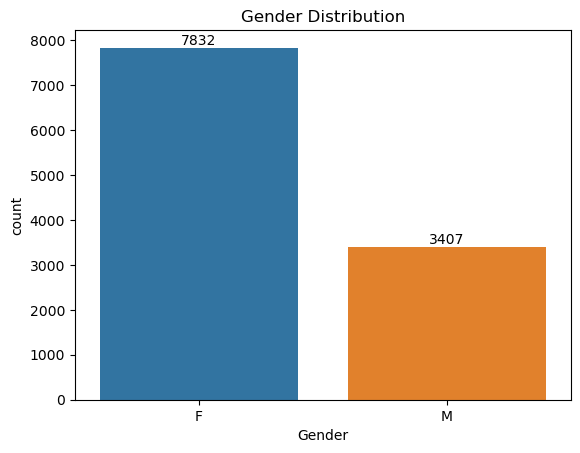

In [36]:
ax = sns.countplot(x='Gender',data=df)
plt.title('Gender Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

In [38]:
sales = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sales

,Gender,Amount
0,F,74335853
1,M,31913276


Text(0.5, 1.0, 'Distribution of Amount spent w.r.t Gender')

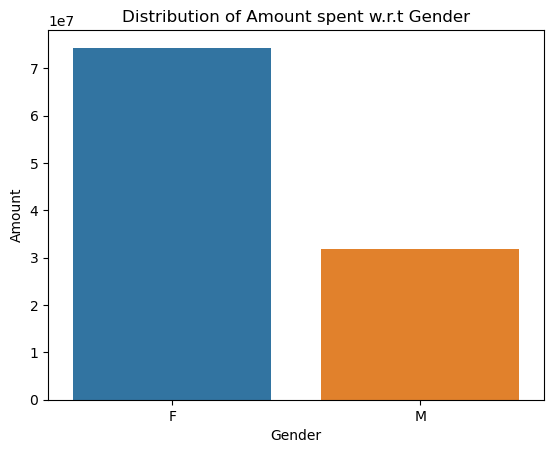

In [39]:
bx=sns.barplot(x='Gender',y='Amount',data= sales)
plt.title('Distribution of Amount spent w.r.t Gender')

### Age

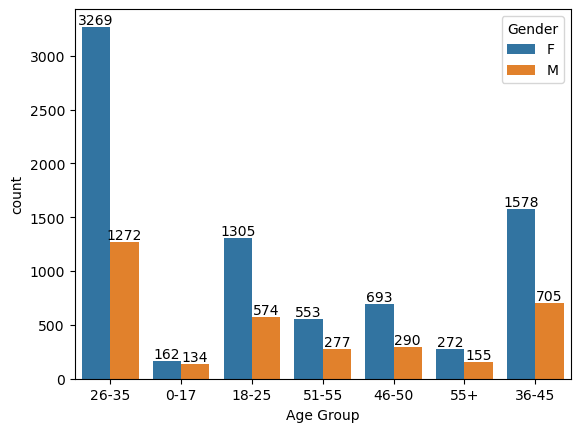

In [43]:
ax= sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Distribution of Amount spent w.r.t Age Group')

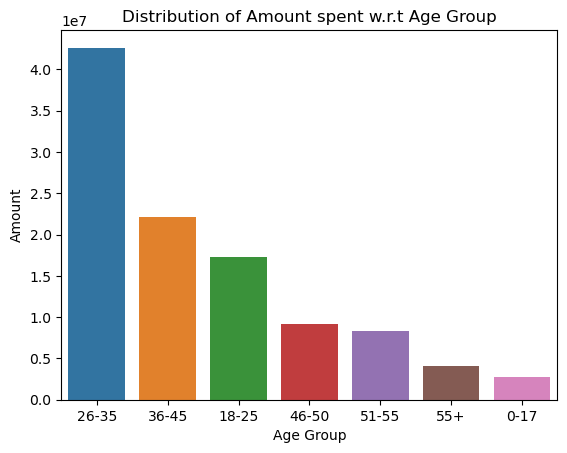

In [45]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Age Group',y='Amount',data= sales_age)
plt.title('Distribution of Amount spent w.r.t Age Group')

### state

In [56]:
#top 10 states having highest no. of orders.
orders_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)
orders_state


,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


Text(0.5, 1.0, 'Distribution of Orders w.r.t State')

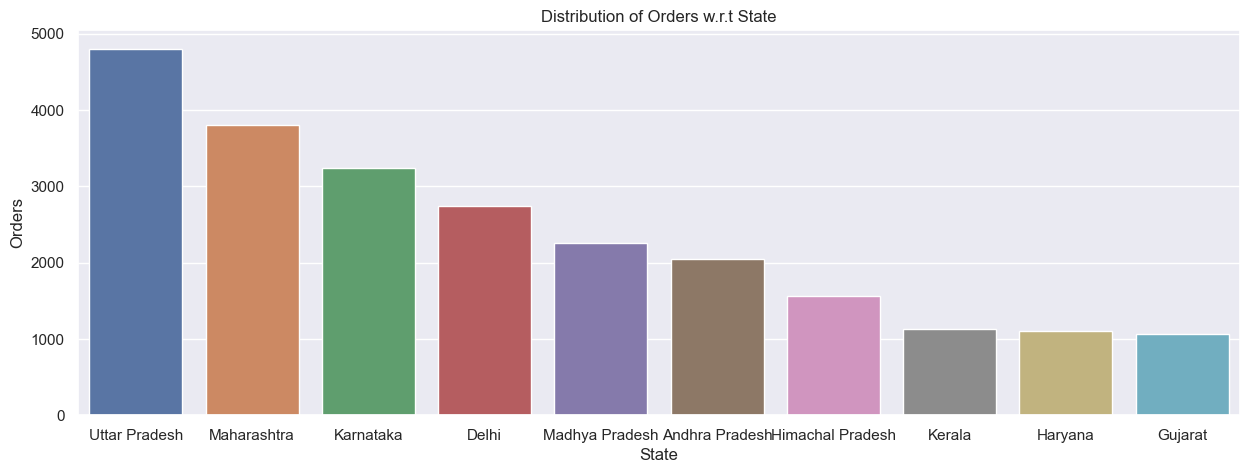

In [57]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data= orders_state)
plt.title('Distribution of Orders w.r.t State')

In [55]:
# top 10 states having highest sales
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


Text(0.5, 1.0, 'Distribution of Orders w.r.t State')

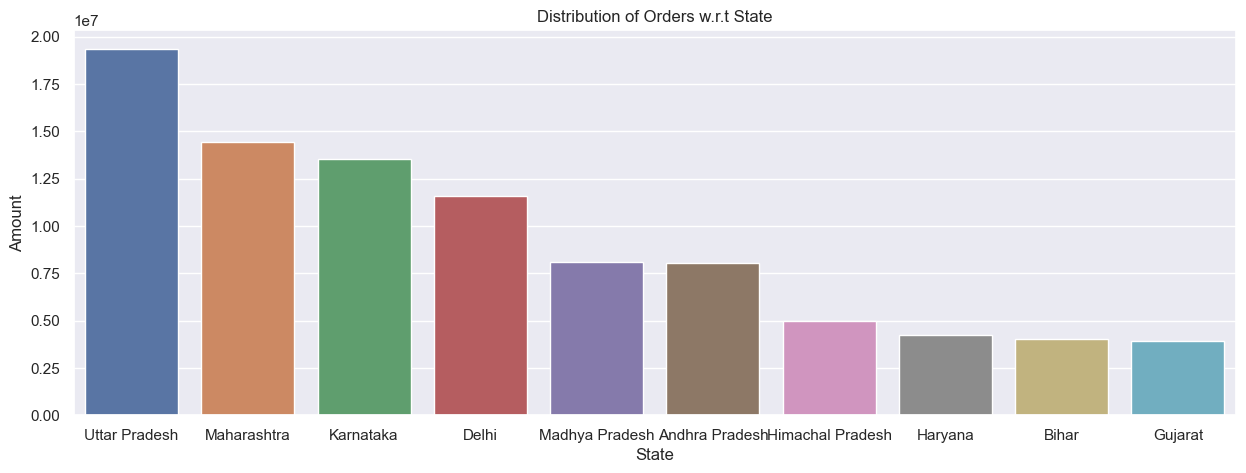

In [58]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data= sales_state)
plt.title('Distribution of Orders w.r.t State')

### Product Category

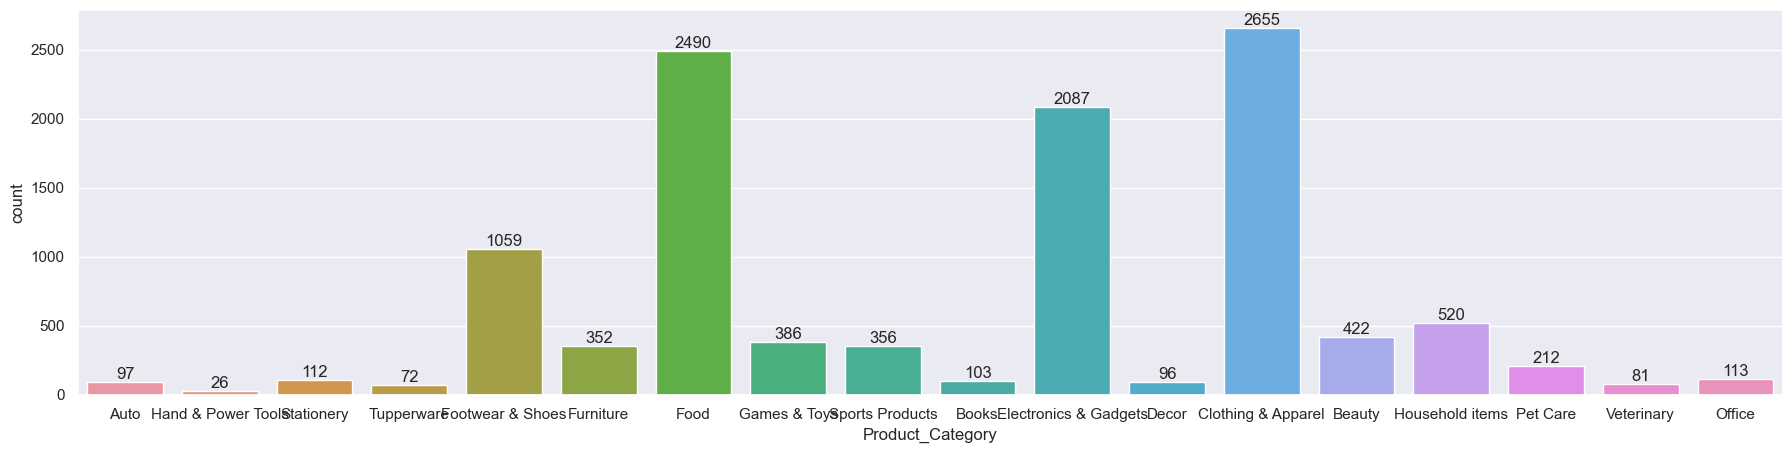

In [67]:
sns.set(rc={'figure.figsize':(22,5)})
ax= sns.countplot(data = df,x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)



In [68]:
sales_product = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sales_product

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


Text(0.5, 1.0, 'Distribution of Amount w.r.t Product Category')

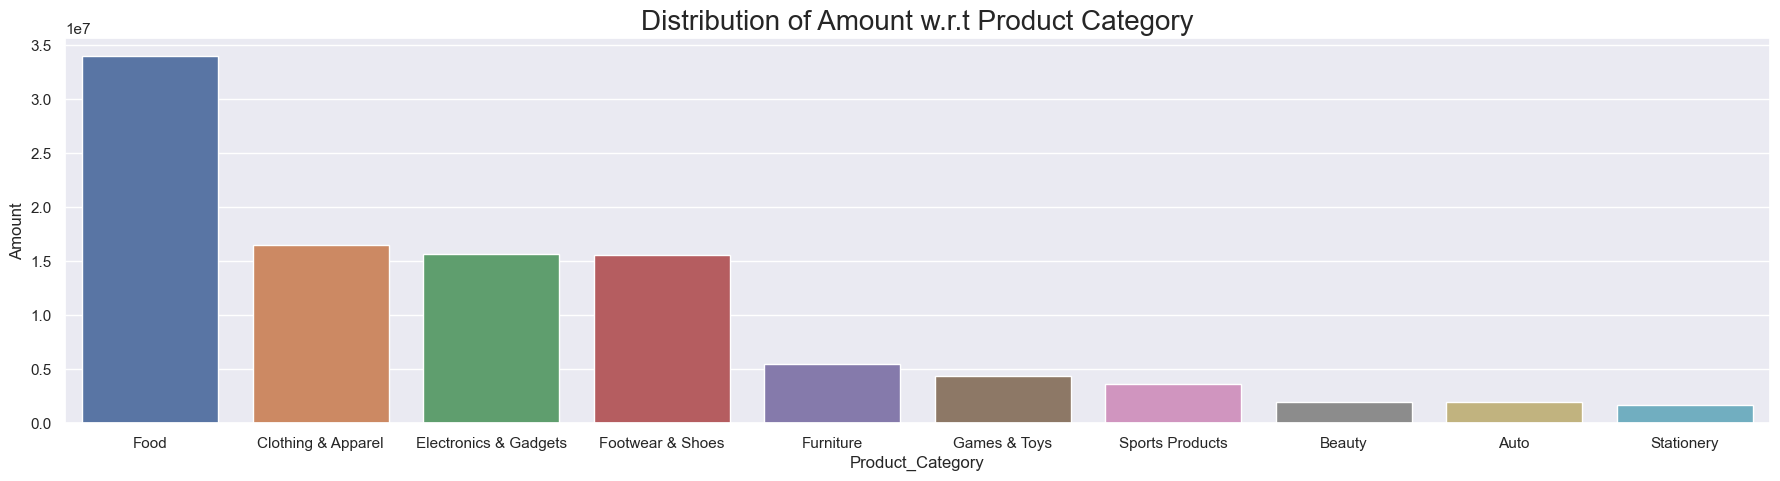

In [70]:
sns.set(rc={'figure.figsize':(22,5)})
sns.barplot(x='Product_Category',y='Amount',data= sales_product)
plt.title('Distribution of Amount w.r.t Product Category',fontsize = 20)

In [73]:
sales_product = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)
sales_product

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


# Conclusion

1. Most of the shopping are done by Females in the age Group 26-35.
2. Top 3 states having most no. of orders are Uttar Pradesh , Maharastra ,Karnataka
3. The most shopped product categories are Food , Clothing Apparel and Electronic Gadgets.